In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
world_Happines=pd.read_csv('rankings.csv')
world_Happines

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [5]:
world_Happines.describe().T

,count,mean,std,min,25%,50%,75%,max
RANK,146.0,73.500000,42.290661,1.000,37.25000,73.5000,109.75000,146.000
Happiness score,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.30500,7.821
Whisker-high,146.0,5.673589,1.065621,2.469,5.00625,5.6800,6.44875,7.886
Whisker-low,146.0,5.433568,1.109380,2.339,4.75475,5.4530,6.19000,7.756
Dystopia (1.83) + residual,146.0,1.831808,0.534994,0.187,1.55525,1.8945,2.15300,2.844
Explained by: GDP per capita,146.0,1.410445,0.421663,0.000,1.09550,1.4455,1.78475,2.209
Explained by: Social support,146.0,0.905863,0.280122,0.000,0.73200,0.9575,1.11425,1.320
Explained by: Healthy life expectancy,146.0,0.586171,0.176336,0.000,0.46325,0.6215,0.71975,0.942
Explained by: Freedom to make life choices,146.0,0.517226,0.145859,0.000,0.44050,0.5435,0.62600,0.740
Explained by: Generosity,146.0,0.147377,0.082799,0.000,0.08900,0.1325,0.19775,0.468


In [6]:
world_Happines.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [7]:
score = world_Happines["Happiness score"]

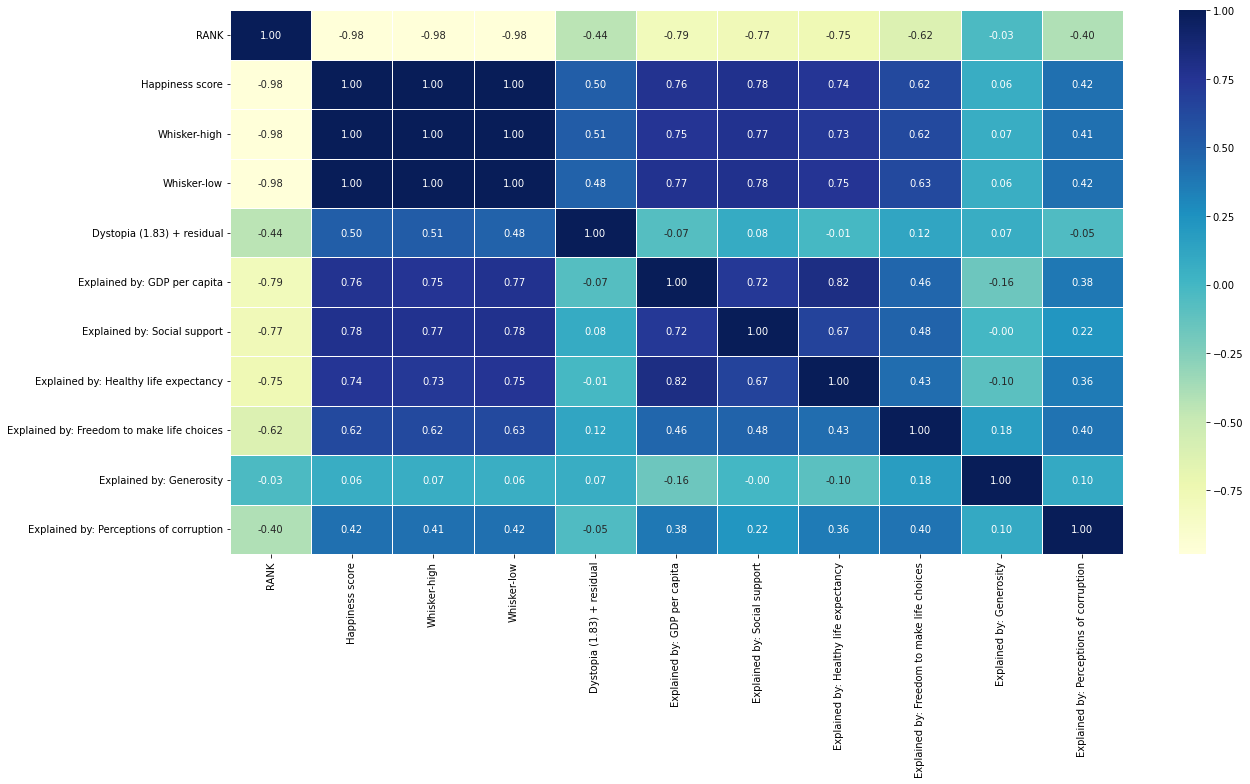

In [8]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(world_Happines.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu');

In [9]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_24740\3879777494.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


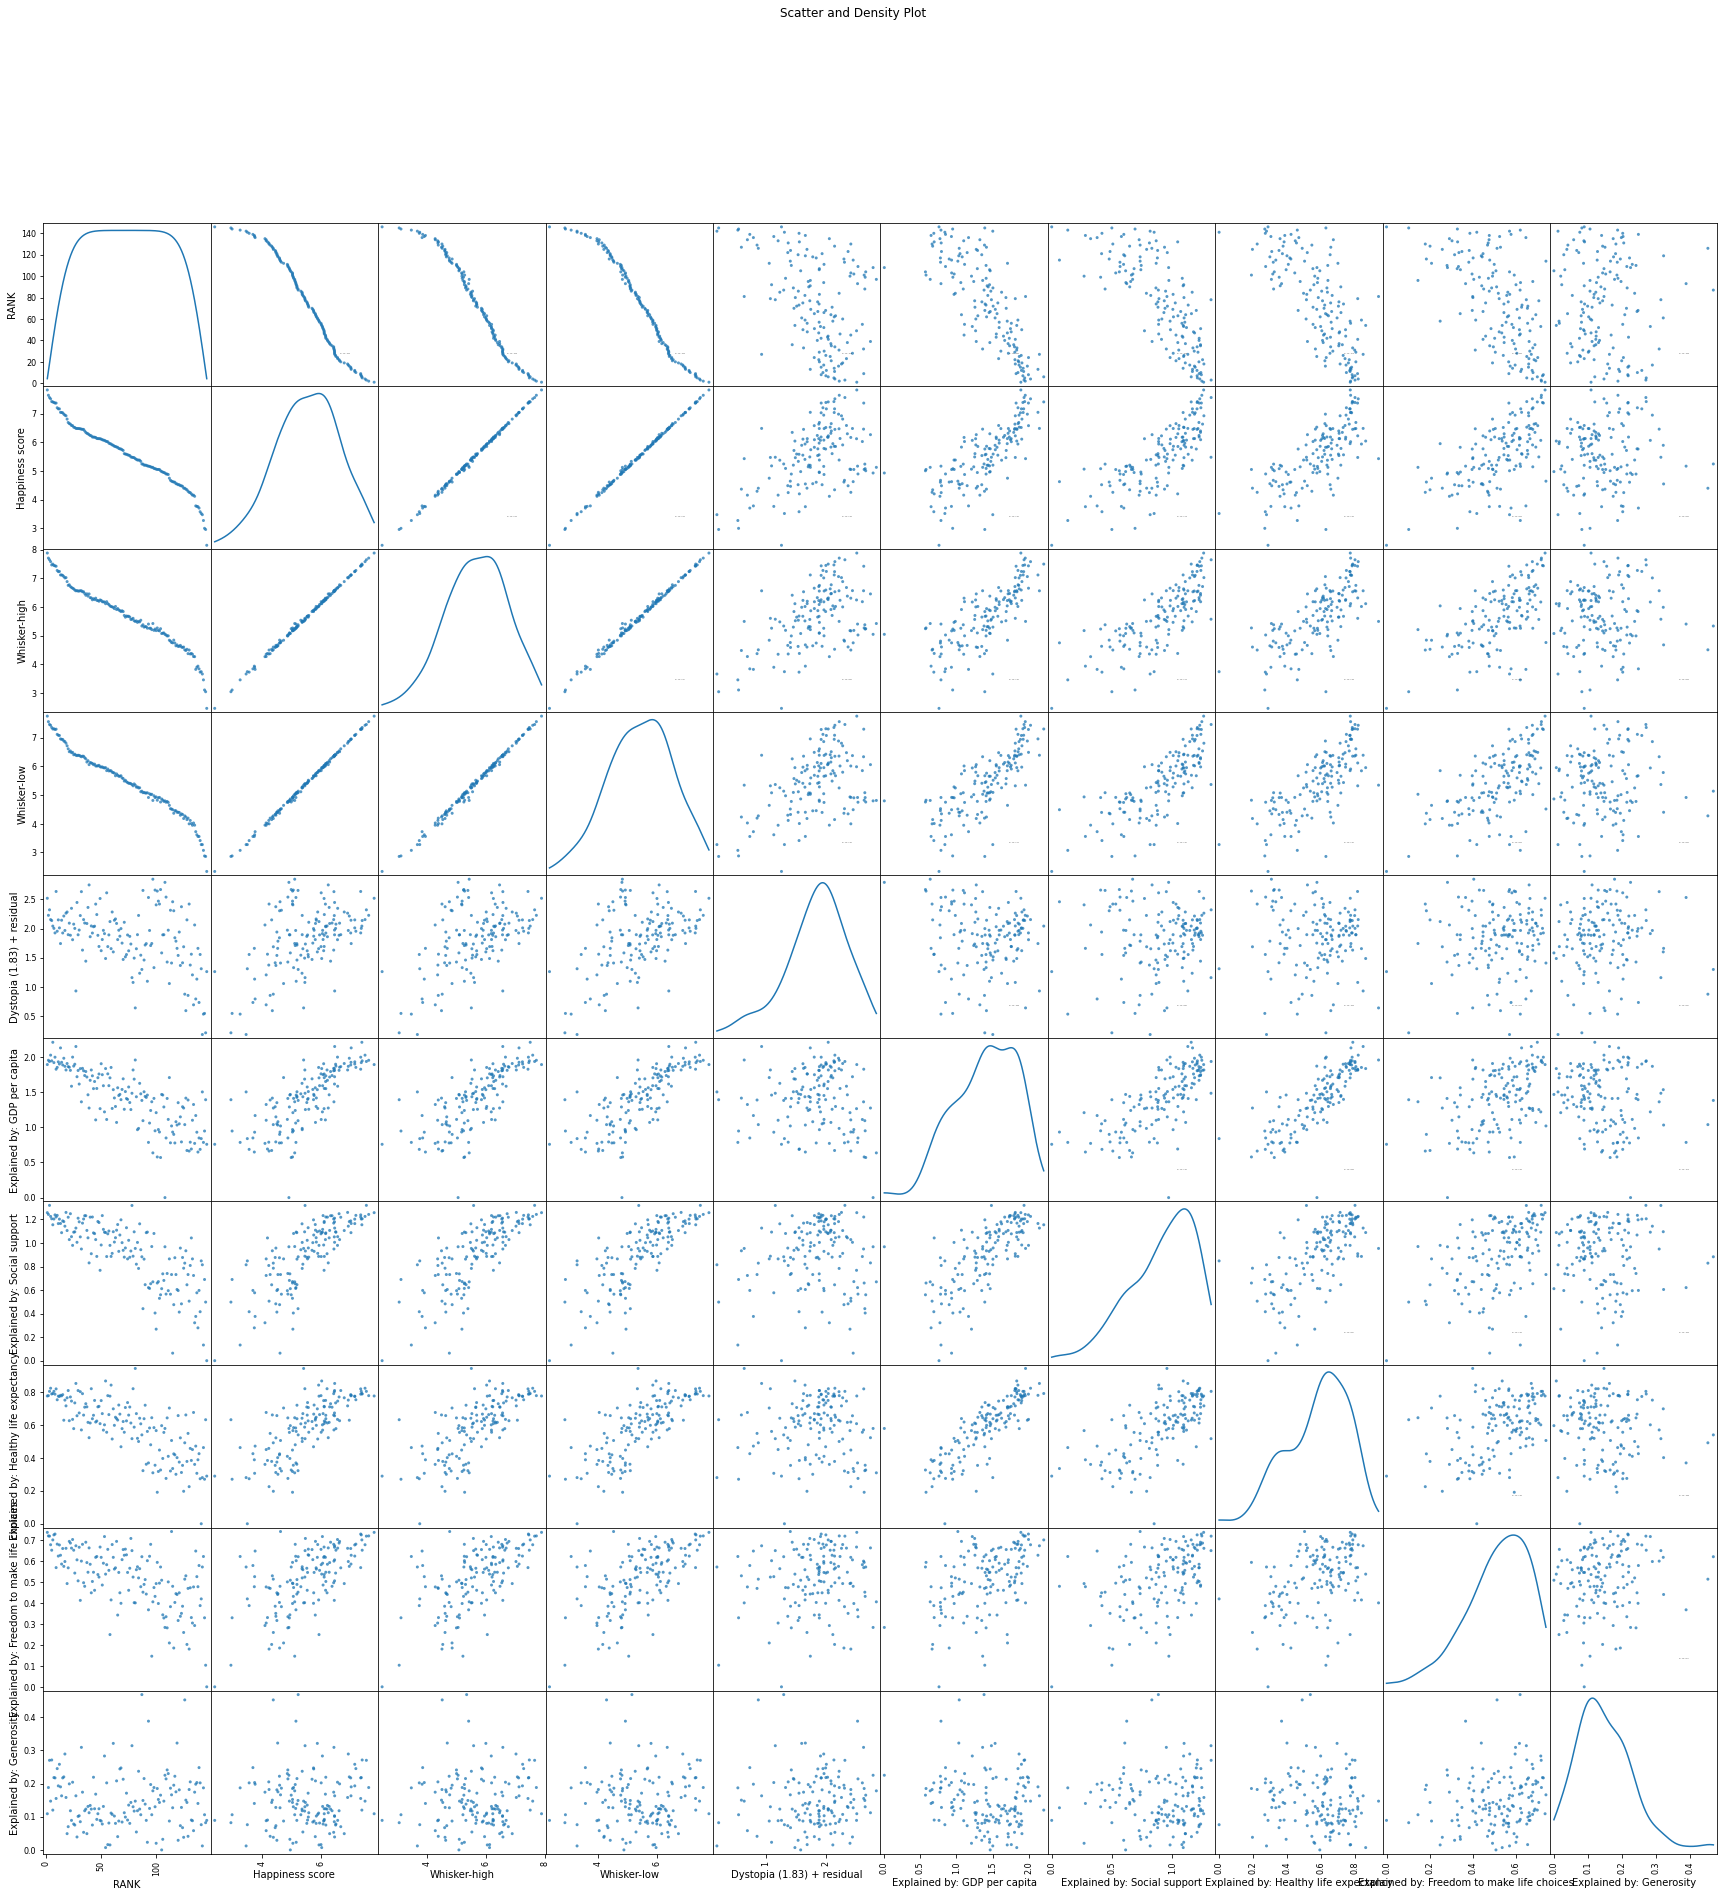

In [10]:
plotScatterMatrix(world_Happines,30,1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [12]:
np.random.seed(42)
class randomForest:
    def __init__(self,DS):
        self.GDP=self.get_by_GDP_Per_Capita(DS)
        self.SocialSupport=self.get_by_Social_Support(DS)
        self.HealthExceptence=self.get_by_Health_Life_Exceptence(DS)
        self.FreeDomToMakeLifeChoices=self.get_by_Freedom_to_make_life_Choices(DS)
        self.Generosity=self.get_by_Generosity(DS)
        self.Corruptions=self.get_by_Perceptions_of_corruption(DS)
        self.REPORT=pd.DataFrame([self.GDP,self.SocialSupport,self.HealthExceptence,self.FreeDomToMakeLifeChoices,self.Generosity,self.Corruptions],columns=["RandomForestRegressor"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
    def get_by_GDP_Per_Capita(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Social_Support(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Health_Life_Exceptence(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Freedom_to_make_life_Choices(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Generosity(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Perceptions_of_corruption(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=RandomForestRegressor(n_estimators=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)


In [13]:
np.random.seed(42)
class linearRegression:
    def __init__(self,DS):
        self.GDP=self.get_by_GDP_Per_Capita(DS)
        self.SocialSupport=self.get_by_Social_Support(DS)
        self.HealthExceptence=self.get_by_Health_Life_Exceptence(DS)
        self.FreeDomToMakeLifeChoices=self.get_by_Freedom_to_make_life_Choices(DS)
        self.Generosity=self.get_by_Generosity(DS)
        self.Corruptions=self.get_by_Perceptions_of_corruption(DS)
        self.REPORT=pd.DataFrame([self.GDP,self.SocialSupport,self.HealthExceptence,self.FreeDomToMakeLifeChoices,self.Generosity,self.Corruptions],columns=["LinearRegression"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
    def get_by_GDP_Per_Capita(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Social_Support(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Health_Life_Exceptence(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Freedom_to_make_life_Choices(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Generosity(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Perceptions_of_corruption(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=LinearRegression(n_jobs=10)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)


In [14]:
np.random.seed(42)
class Svr:
    def __init__(self,DS):
        self.GDP=self.get_by_GDP_Per_Capita(DS)
        self.SocialSupport=self.get_by_Social_Support(DS)
        self.HealthExceptence=self.get_by_Health_Life_Exceptence(DS)
        self.FreeDomToMakeLifeChoices=self.get_by_Freedom_to_make_life_Choices(DS)
        self.Generosity=self.get_by_Generosity(DS)
        self.Corruptions=self.get_by_Perceptions_of_corruption(DS)
        self.REPORT=pd.DataFrame([self.GDP,self.SocialSupport,self.HealthExceptence,self.FreeDomToMakeLifeChoices,self.Generosity,self.Corruptions],columns=["SVR"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
    def get_by_GDP_Per_Capita(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Social_Support(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Health_Life_Exceptence(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Freedom_to_make_life_Choices(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Generosity(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Perceptions_of_corruption(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)


In [15]:
np.random.seed(42)
class polynomialRegression:
    def __init__(self,DS):
        self.GDP=self.get_by_GDP_Per_Capita(DS)
        self.SocialSupport=self.get_by_Social_Support(DS)
        self.HealthExceptence=self.get_by_Health_Life_Exceptence(DS)
        self.FreeDomToMakeLifeChoices=self.get_by_Freedom_to_make_life_Choices(DS)
        self.Generosity=self.get_by_Generosity(DS)
        self.Corruptions=self.get_by_Perceptions_of_corruption(DS)
        self.REPORT=pd.DataFrame([self.GDP,self.SocialSupport,self.HealthExceptence,self.FreeDomToMakeLifeChoices,self.Generosity,self.Corruptions],columns=["polynomialRegression"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
    def get_by_GDP_Per_Capita(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Social_Support(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Health_Life_Exceptence(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Freedom_to_make_life_Choices(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Generosity(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Perceptions_of_corruption(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)


In [16]:
np.random.seed(42)
class decisionTreeRegression:
    def __init__(self,DS):
        self.GDP=self.get_by_GDP_Per_Capita(DS)
        self.SocialSupport=self.get_by_Social_Support(DS)
        self.HealthExceptence=self.get_by_Health_Life_Exceptence(DS)
        self.FreeDomToMakeLifeChoices=self.get_by_Freedom_to_make_life_Choices(DS)
        self.Generosity=self.get_by_Generosity(DS)
        self.Corruptions=self.get_by_Perceptions_of_corruption(DS)
        self.REPORT=pd.DataFrame([self.GDP,self.SocialSupport,self.HealthExceptence,self.FreeDomToMakeLifeChoices,self.Generosity,self.Corruptions],columns=["DecisionTree"],index=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
    def get_by_GDP_Per_Capita(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: GDP per capita"],columns=["Explained by: GDP per capita"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Social_Support(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Social support"],columns=["Explained by: Social support"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Health_Life_Exceptence(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Healthy life expectancy"],columns=["Explained by: Healthy life expectancy"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Freedom_to_make_life_Choices(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Freedom to make life choices"],columns=["Explained by: Freedom to make life choices"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Generosity(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Generosity"],columns=["Explained by: Generosity"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)
    def get_by_Perceptions_of_corruption(self,DS):
        x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(DS["Explained by: Perceptions of corruption"],columns=["Explained by: Perceptions of corruption"]),pd.DataFrame(DS["Happiness score"],columns=["Happiness score"]),test_size=0.2)
        getByGDP=DecisionTreeRegressor(max_depth=100)
        getByGDP.fit(x_train,y_train)
        return getByGDP.score(x_test,y_test)


C:\Users\Hello\AppData\Local\Temp\ipykernel_24740\2802470115.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)
C:\Users\Hello\AppData\Local\Temp\ipykernel_24740\2802470115.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)
C:\Users\Hello\AppData\Local\Temp\ipykernel_24740\2802470115.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.fit(x_train,y_train)
C:\Users\Hello\AppData\Local\Temp\ipykernel_24740\2802470115.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  getByGDP.f

(<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

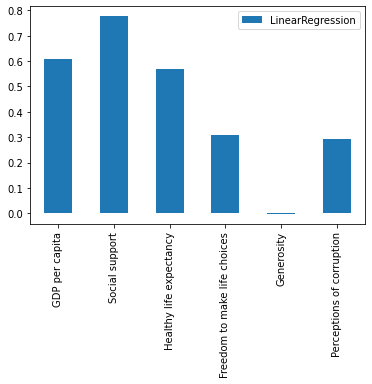

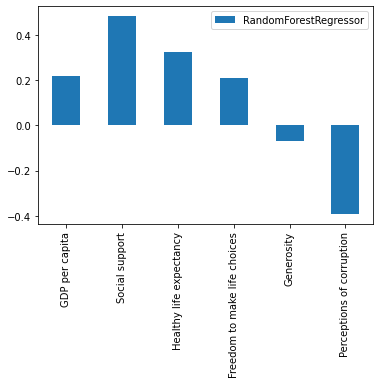

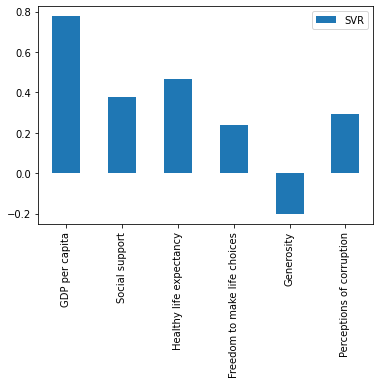

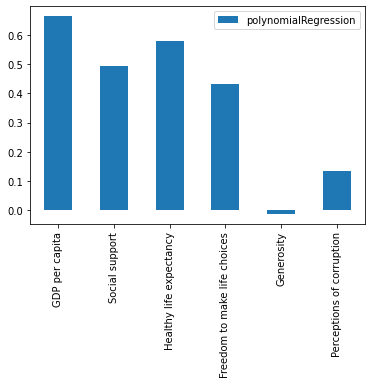

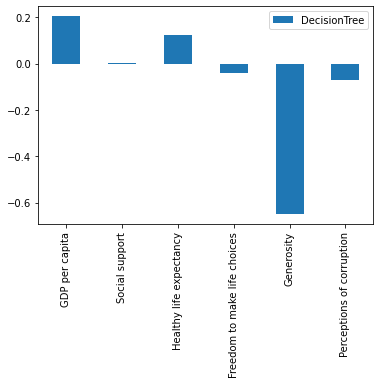

In [17]:
np.random.seed(42)
linearRegression(world_Happines).REPORT.plot.bar(),randomForest(world_Happines).REPORT.plot.bar(),Svr(world_Happines).REPORT.plot.bar(),polynomialRegression(world_Happines).REPORT.plot.bar(),decisionTreeRegression(world_Happines).REPORT.plot.bar()

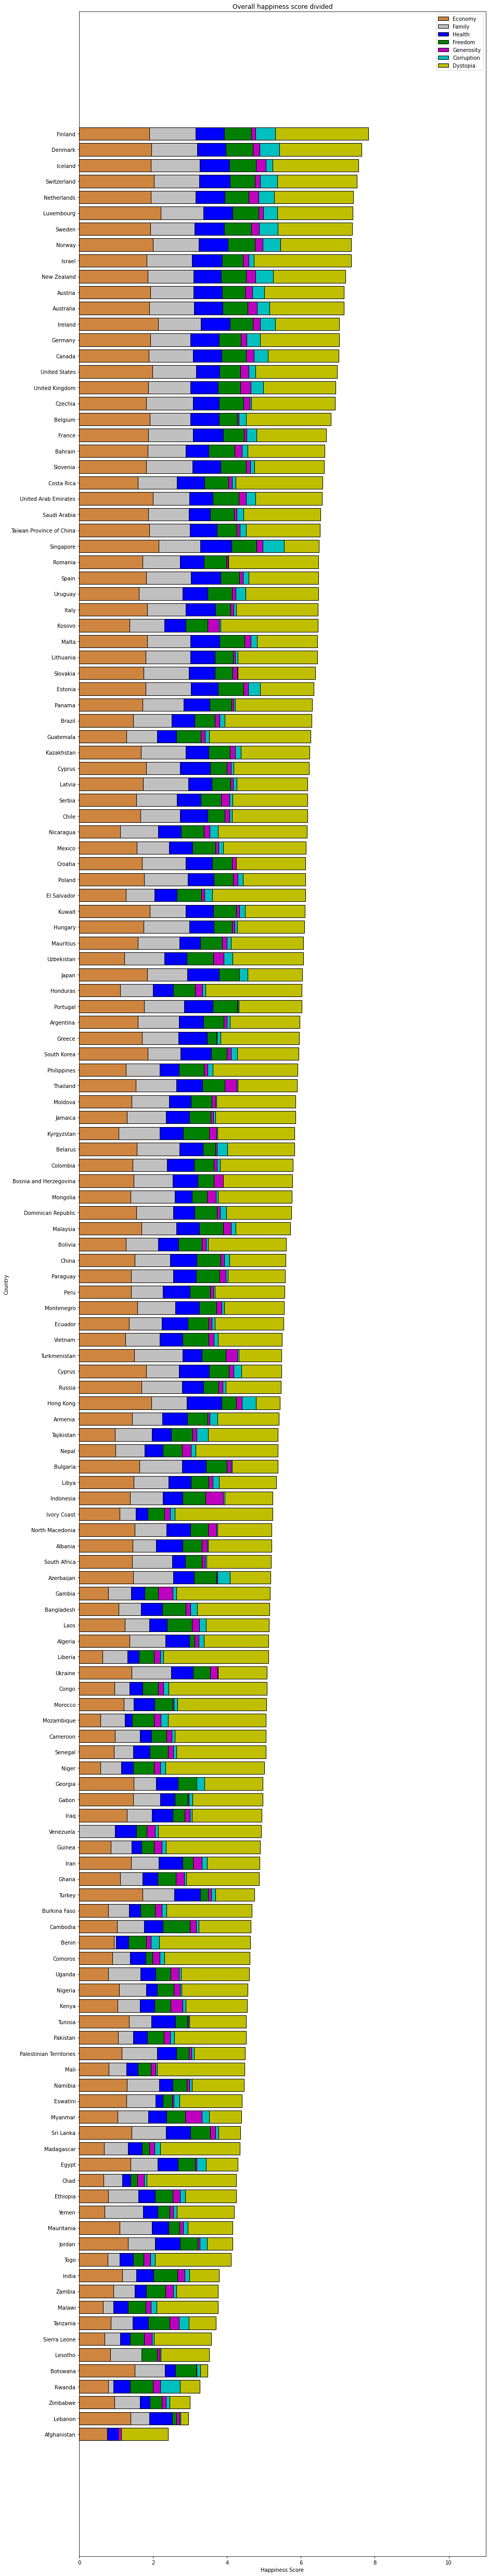

In [27]:
y_cor = np.arange(146) 
Country = world_Happines["Country"][::-1]
Economy = world_Happines["Explained by: GDP per capita"][::-1]
Social_support  = world_Happines["Explained by: Social support"][::-1]
Health = world_Happines["Explained by: Healthy life expectancy"][::-1]
Freedom = world_Happines["Explained by: Freedom to make life choices"][::-1]
Generosity = world_Happines["Explained by: Generosity"][::-1]
Corruption = world_Happines["Explained by: Perceptions of corruption"][::-1]
Dystopia = world_Happines["Dystopia (1.83) + residual"][::-1]
fig, ax = plt.subplots(figsize = (14,90)) 
plt.barh(y_cor, Economy,color='#CD853F', edgecolor='black', label='Economy') 
plt.barh(y_cor, Social_support,color='silver', edgecolor='black', left=Economy, label='Family') 
plt.barh(y_cor, Health,color='blue', edgecolor='black', left=Social_support+Economy, label='Health') 
plt.barh(y_cor, Freedom,color='green', edgecolor='black', left=Health+Social_support+Economy, label='Freedom') 
plt.barh(y_cor, Generosity,color='m', edgecolor='black', left=Freedom+Health+Social_support+Economy, label='Generosity') 
plt.barh(y_cor, Corruption,color='c', edgecolor='black', left=Generosity+Freedom+Health+Social_support+Economy, label='Corruption') 
plt.barh(y_cor, Dystopia,color='y', edgecolor='black', left=Corruption+Generosity+Freedom+Health+Social_support+Economy, label='Dystopia') 
plt.yticks(y_cor,Country) 
plt.title('Overall happiness score divided') 
plt.xlabel('Happiness Score') 
plt.ylabel('Country') 
plt.legend(loc='upper right') 
plt.xlim(0,11)
plt.show()